Title: Linear Threshold Units
Author: Thomas M. Breuel
Institution: UniKL

In [267]:

from pylab import *
from IPython.core.display import Image 
def fig(x): return Image(filename="Figures/"+x+".png") 
from pylab import *
def figs(*args):
    for i,f in enumerate(args):
        subplot(1,len(args),i+1)
        axis("off")
        fig = imshow(imread("Figures/"+f+".png"))
        
from scipy import linalg

# McCulloch-Pitts Neurons

(Continuous Time Models)

In previous lectures, we looked at various more-or-less realistic neuron models that treated neurons as dynamical systems operating in continuous time:

- inputs to the neuron were abstracted as an external input current $I_e$
- the input current was the temporal and spatial summation of individual synaptic currents
- the input current then triggered spikes in the trigger zone
- the neuron produces (under some conditions) a spike train for inputs above a threshold

(Discrete Time Abstraction)

Assume time is discrete. Then:

- at time $t$ each synaptic input to a neuron either has a spike or doesn't have a spike
- if it has a spike, it generates some input current that depends on the _weight_ of the synapse
- all these input currents are assumed to be summed instantaneously
- if the output is above the trigger threshold for the neuron, a spike is generated

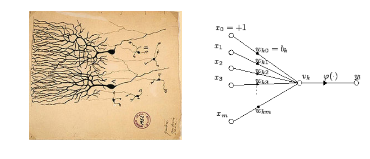

In [268]:
# McCulloch-Pitts Neuron
figs("mp-concrete","mp-neuron-abstract")

(McCulloch-Pitts Neuron)

Component-wise notation:

$$ y = \phi(\sum_{j=1}^m w_j x_j+x_0) $$

Vector notation:

$$ y = \phi(w\cdot x + x_0) $$

(Multiple McCulloch-Pitts Neurons)

Component-wise notation:

$$ y_k = \phi(\sum_{j=1}^m w_{kj}x_j+x_0) $$

Matrix notation:

$$ y = \phi(W \cdot x + x_0) $$

(Rate Coding Justification)

The original McCulloch-Pitts justification was a discrete time model. We can also take another view:

- each input fires at some rat
- the higher the firing rate, the higher the integrated voltage/current
- integrated voltages increase the voltage at the trigger zone
- below a some threshold, there is no spike output
- above some threshold, the neuron fires as fast as possible
- between the lower and upper thresholds, there is a smooth transition
- the relationship between input frequencies and output frequencies is non-linear

(Linear Threshold Unit)

$\phi(\cdot)$ is some non-linearity.

We commonly choose the _Heaviside function_:

$$ H(x) = \left\lfloor x>0 \right\rfloor $$

This gives rise to _linear threshold units_ or _linear threshold neurons_.



In [269]:
def H(x): return 1.0*(x>=0.0)

(Linear Threshold Units)

$$ f(x) = \left\lfloor \sum_{j=1}^N w_j x_j > \theta \right\rfloor $$
$$ ~~~ = H(\sum w_j x_j - \theta) $$

(Linear Threshold Units as Boolean Gates)

The $x_j$ are assumed to be binary input values. What can we compute with LTUs?

AND-gate

$$ \hbox{AND}(x_1,...,x_N) = \left\lfloor \sum_{j=1}^N x_j \geq N \right\rfloor $$

OR-gate

$$ \hbox{OR}(x_1,...,x_N) = \left\lfloor \sum_{j=1}^N x_j \geq 1 \right\rfloor $$




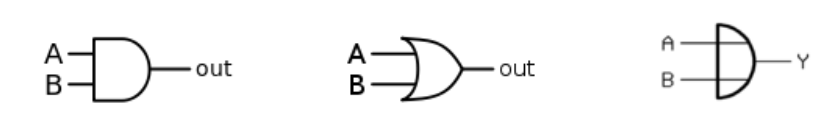

In [270]:
fig("gates-1")

(Negation)

To build negation, we need _negative input weights_.

This corresponds to _inhibitory synapses_.

NAND-gate (and NOT gate):

$$ \hbox{NAND}(x_1,...,x_N) = \left\lfloor \sum_{j=1}^N -1 \cdot x_j > -N \right\rfloor $$




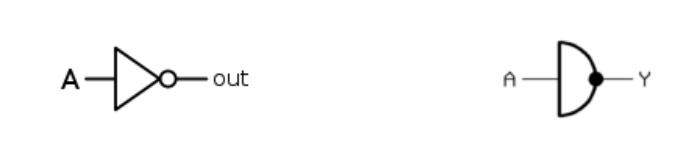

In [271]:
fig("gates-2")

(Neural Networks as Logic Circuits)

By setting the weights appropriately, we can create AND, OR, NAND, and NOT gates out of linear threshold units.

Linear threshold units are one time step delay gates.

Take together, this means we can build arbitrary computations out of these circuits.

# Computational Universality

(Computational Universality)

- Turing completeness: a system can emulate a Turing machine
- Turing equivalence: a system can emulate and be emulated by a Turing machine
- Computational universality: roughly equivalent to Turing equivalence, but may refer to slight modifications (e.g., circuit complexity)

Are networks of neurons Turing equivalent?

- simple answer: "it's logic gates, so we can build a computer"
- but... it's sychronized in a particular way, so we have to show _something_
- it's useful to construct this explicity

http://en.wikipedia.org/wiki/Computational_universality

(Cellular Automata)

- cellular automata are regular grids of processors with local connections.
- updates are generally performed in parallel
- cellular automata are discrete space, discrete time, and discrete value analogs of partial differential equations

(3-Neighborhood 1D Cellular Automata)

- Consider an infinite 1D array $x_i$ containing values in $\{0,1\}$.
- The three-neighborhood of position $i$ consists of the values $x_{i-1}$, $x_i$ and $x_i+1$.
- There are 8 possible values, from $000_2$ to $111_2$.
- For each of these 8 possible values, we write down what the new value at position $i$ shall be at the next time step.
- There are 8 binary choices, so there are a total of 256 different 3-neighborhood 1D cellular automata.
- We list the 8 binary choices as a binary number and convert to decimal to get the "rule number".

(Rule 110)

Rule 110 is the rule corresponding to choices $01101110$ for the 8 different outputs for inputs $111_2$ down to $000_2$.

Rule 110 has been shown to be computationally universal by having disturbances (like particles in 1D) interact with each other.


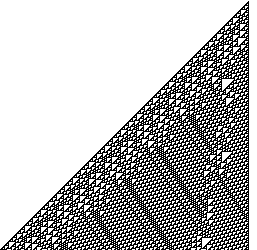

In [272]:
# example output from Rule 110
fig("r110-example")

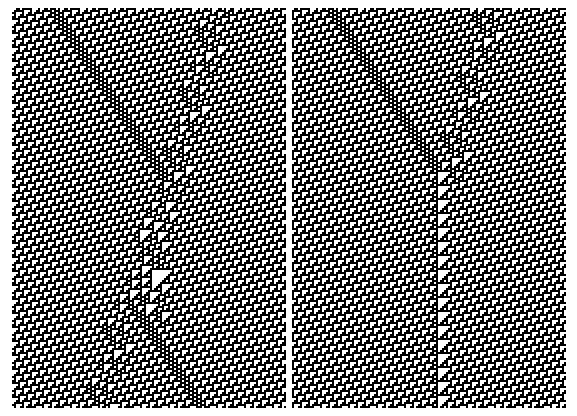

In [273]:
# interacting "particles" in Rule 110
fig("r110-interactions")

(Tag Systems for Turing Equivalence)

- consider a FIFO or a string
- a tag system consists of rules that match and delete at the beginning of the string and conditionally append to the end of the string
- tag systems are computationally universal
- Rule 110 can be transformed into a tag system
- therefore, showing that neural networks can implement Rule 110 shows that they are Turing equivalent


(Tag Systems and Rule 110 Example)

http://uncomp.uwe.ac.uk/genaro/rule110/ctsRule110.html




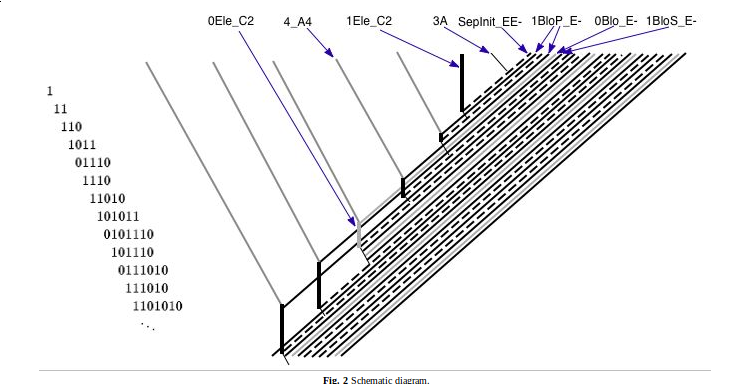

In [285]:
fig("rule110-construction")

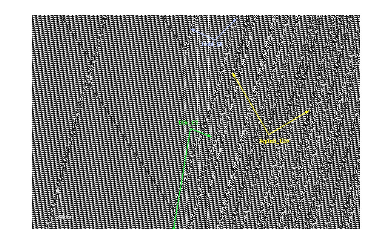

In [287]:
# Rule 110 Zoom
# http://uncomp.uwe.ac.uk/genaro/rule110/ctsRule110.html
figs("rule110-zoom")

(Finite Circuits and Turing Equivalence)

problem:

- neural networks are necessarily finite size
- Turing equivalence means that something needs to work for arbitrary sized inputs

solution:

- same as in circuit complexity
- we give a general rule for how to build circuits of all sizes
- we give a rule determining from the input size how big a circuit should be constructed to solve the problem


We start off with defining a size for the input, a number of iterations to run, and an initial random boolean vector.




In [274]:
N = 100
niter = 100
vstart = 1.0 * (rand(N)>0.5)

(Encoding Rule 110 as Matrix Operations)

The idea behind encoding Rule 110 as matrix operations is the following:

- we observe that there are only two cases where the output is zero
- all bits in the 3-neighborhood are 1: $111$ $\rightarrow$ zero output
- the two rightmost bits are 1: $?00$ $\rightarrow$ zero output

Given a vector $(...,x_i-1,x_i,x_i+1,...)$, we can test whether all three bits are 1 by computing a dot product:

$$ (0,...,0,1,1,1,0,...,0) \cdot (...,x_i-1,x_i,x_i+1,...) \geq 3 $$

We can do this for every 3-neighborhood by constructing a _circulant matrix_.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


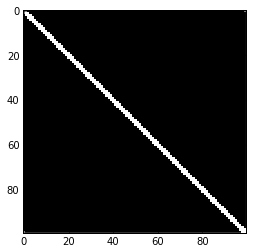

In [275]:
# counting the number of bits
Mall = linalg.circulant(1*(roll(arange(N)<3,-1)))
imshow(Mall,interpolation='none',cmap=cm.gray)
print 1*(dot(Mall,vstart)>=3)

With the same idea, we test whether the two rightmost bits are zero.



In [276]:
Mlo = linalg.circulant(-1*(arange(N)<2))

We can now put these two ideas together and compute vectors $v_{111}$ and $v_{x00}$ that indicate whether we are in a $111$ or $x00$ neighborhood.

We can then compute another threshold function to compute the NOR of these two vectors to get the final output.

In [277]:
# Rule 110, two steps
v = vstart.copy()
result = []
for i in range(niter):
    result.append(v)
    v111 = (dot(Mall,v)>=3)
    vx00 = (dot(Mlo,v)>=0)
    on = (-1*v111-1*vx00>=0)
    v = 1*on

This actually looks quite nicely like Rule 110 ought to look.




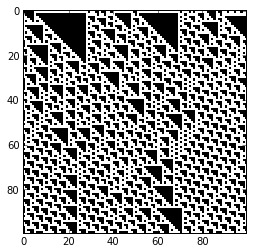

In [278]:
imshow(array(result),interpolation='nearest',cmap=cm.gray)

(Single Recurrent Neural Network)

This isn't quite a recurrent neural network yet.

To get that, we pack together the vector $v$ with two variables representing intermediate states of the computation.

If you work out the matrix multiplications, you'll see that this outputs a row of the original output every other step.



In [279]:
Z = zeros((N,N))
v = concatenate([vstart,zeros(2*N)])
M = array(bmat([[Z,-1*eye(N),-1*eye(N)],[Mall,Z,Z],[Mlo,Z,Z]]))
b = concatenate([zeros(N),3*ones(N),zeros(N)])

(Weight Matrix)

This shows the weight matrix of the single layer recurrent network for Rule 110.
Note that all the green entries are 0.
We can greatly speed up such computations using a _sparse matrix package_.

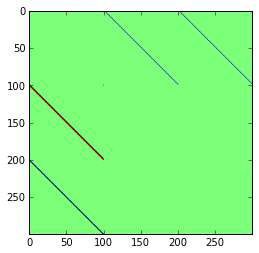

In [280]:

imshow(M)

After this packing, the entire inner loop is a simpler recurrent layer of linear threshold units.



In [281]:
result = []
for i in range(2*niter):
    result.append(v)
    v = H(dot(M,v)-b)

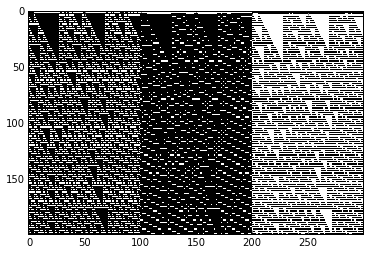

In [282]:
result = array(result)
imshow(result,interpolation='nearest',cmap=cm.gray)

To extract the Rule 110 result, we just take every other output, and we ignore the intermediate results.



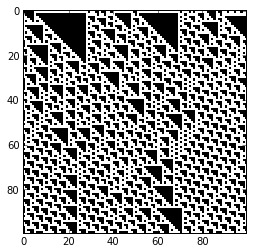

In [283]:
imshow(result[::2,:N],interpolation='nearest',cmap=cm.gray)

(Summary)

- we implemented Rule 110 as a recurrent, single-layer neural network with McCulloch-Pitts neurons
- Rule 110 can emulate a tag system
- a tag system can emulate a Turing machine

Therefore, recurrent single layer neural networks are Turing complete.

We also could emulate a Turing machine directly.